In [10]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import os

BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-0.png', 'cat-4.png', 'cat-1.png', 'cat-3.png', 'cat-2.png']

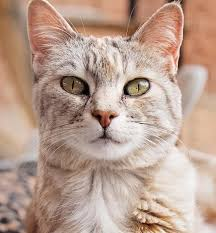

In [47]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-3.png")
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(rgb))

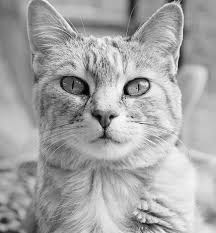

In [48]:
# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # can also convert to other colors (cv.COLOR_...)

gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
display(Image.fromarray(gray))

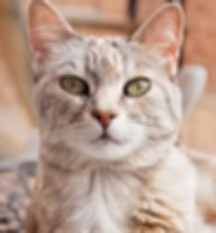

In [49]:
# blur image
# ksize is kernel size (has to be an odd number)
# increased ksize results in much more blur
blurred = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=cv.BORDER_DEFAULT)
blurred = cv.cvtColor(blurred, cv.COLOR_BGR2RGB)
display(Image.fromarray(blurred))

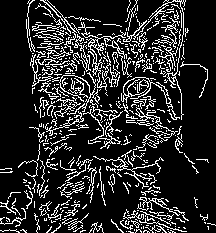

In [50]:
# Edge Cascade (shows the edges of each object in the image)
edited = cv.Canny(img, threshold1=150, threshold2=100)
edited = cv.cvtColor(edited, cv.COLOR_BGR2RGB)
display(Image.fromarray(edited))

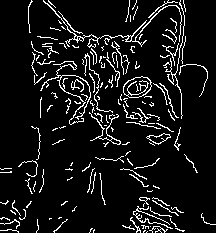

In [61]:
# blur and edge cascade (results in less edges than the normal image)
edited = cv.GaussianBlur(img, ksize=(3, 3), sigmaX=cv.BORDER_DEFAULT)
edited = cv.Canny(edited, threshold1=150, threshold2=100)
edited = cv.cvtColor(edited, cv.COLOR_BGR2RGB)
display(Image.fromarray(edited))

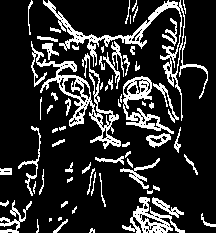

In [62]:
# Dilating the image (make the edges smoother)
edited = cv.GaussianBlur(img, ksize=(3, 3), sigmaX=cv.BORDER_DEFAULT)
edited = cv.Canny(edited, threshold1=150, threshold2=100)
dilated = cv.dilate(edited, kernel=(3, 3), iterations=2)
dilated = cv.cvtColor(dilated, cv.COLOR_BGR2RGB)
display(Image.fromarray(dilated))

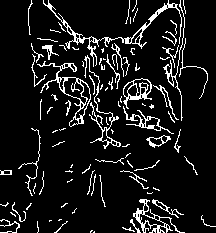

In [63]:
# Eroding (the opposite of dilating) the dilated image
edited = cv.GaussianBlur(img, ksize=(3, 3), sigmaX=cv.BORDER_DEFAULT)
edited = cv.Canny(edited, threshold1=150, threshold2=100)
dilated = cv.dilate(edited, kernel=(3, 3), iterations=2)
eroded = cv.erode(dilated, kernel=(3, 3), iterations=2)
dilated = cv.cvtColor(eroded, cv.COLOR_BGR2RGB)
display(Image.fromarray(dilated))

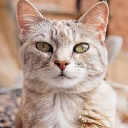

In [64]:
# Resize
# interpolation=cv.INTER_AREA is useful if you want to resize the image to a smaller size
# interpolation=cv.INTER_LINEAR is useful if you want to resize the image to a larger size
# interpolation=cv.INTER_CUBIC is useful if you want to resize the image to a larger size (slower but better quality)
resized = cv.resize(img, dsize=(128, 128), interpolation=cv.INTER_AREA)
resized = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
display(Image.fromarray(resized))

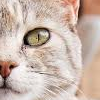

In [66]:
# Cropping
cropped = img[50:150, 100:200]
cropped = cv.cvtColor(cropped, cv.COLOR_BGR2RGB)
display(Image.fromarray(cropped))

In [ ]:
cv.imshow("Cat gray", gray)
cv.waitKey(0)
cv.destroyAllWindows()